In [1]:
import pandas as pd
import geopandas as gd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sn

In [2]:
os.chdir('/projects/canis/eoc_feature_corr')

In [3]:
grid_path = "data/by_state/WV/wv_extent_1km_grid.shp"
original_grid = gd.read_file(grid_path)
original_grid = original_grid.set_index('id')
grid = original_grid

In [4]:
chg_path = "data/challenger_speed_tests/chg_54_entity_46283_challenger_speed_tests_valid_certified.csv"
chg_data1 = pd.read_csv(chg_path, parse_dates=['timestamp'])
chg_path = "data/challenger_speed_tests/chg_54_entity_31168_challenger_speed_tests_valid_certified.csv"
chg_data2 = pd.read_csv(chg_path, parse_dates=['timestamp'])
chg_path = "data/challenger_speed_tests/chg_54_entity_93622_challenger_speed_tests_valid_certified.csv"
chg_data3 = pd.read_csv(chg_path, parse_dates=['timestamp'])

chg_data = pd.concat([chg_data1, chg_data2, chg_data3])
chg = gd.GeoDataFrame(chg_data, geometry=gd.points_from_xy(chg_data.longitude, chg_data.latitude)).set_crs("EPSG:4326").to_crs(grid.crs)

In [5]:
chg[chg['provider_name'] == 'Verizon Wireless']

,latitude,longitude,timestamp,signal_strength,download_speed,latency,provider_id,provider_name,device_id,masked_device_imei,measurement_method_code,measurement_app_name,measurement_server_location,masked_entity_id,state_fips,grid_col,grid_row,geometry
0,37.843510,-80.813187,2018-05-31 06:04:34-04:00,0.0,0.0,0,70,Verizon Wireless,73,7264,2,XCAL-M,23.21.101.24,31168,54,4240,1598,POINT (-8996082.826 4557342.550)
1,37.843510,-80.813202,2018-05-31 06:04:35-04:00,0.0,0.0,0,70,Verizon Wireless,73,7264,2,XCAL-M,23.21.101.24,31168,54,4240,1598,POINT (-8996084.496 4557342.550)
2,37.843521,-80.813202,2018-05-31 06:04:36-04:00,0.0,0.0,0,70,Verizon Wireless,73,7264,2,XCAL-M,23.21.101.24,31168,54,4240,1598,POINT (-8996084.496 4557344.101)
3,37.843521,-80.813210,2018-05-31 06:04:37-04:00,0.0,0.0,0,70,Verizon Wireless,73,7264,2,XCAL-M,23.21.101.24,31168,54,4240,1598,POINT (-8996085.387 4557344.101)
4,37.843521,-80.813217,2018-05-31 06:04:38-04:00,0.0,0.0,0,70,Verizon Wireless,73,7264,2,XCAL-M,23.21.101.24,31168,54,4240,1598,POINT (-8996086.166 4557344.101)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,38.277410,-80.759270,2018-11-25 16:49:00-06:00,0.0,0.0,0,70,Verizon Wireless,73,4145,1,Ookla,NaN,93622,54,4237,1647,POINT (-8990080.813 4618689.004)
1315,38.281370,-80.761920,2018-11-25 16:53:00-06:00,0.0,0.0,0,70,Verizon Wireless,73,4145,1,Ookla,NaN,93622,54,4237,1647,POINT (-8990375.810 4619250.565)
1316,38.283510,-80.763200,2018-11-25 16:54:00-06:00,0.0,0.0,0,70,Verizon Wireless,73,4145,1,Ookla,NaN,93622,54,4237,1648,POINT (-8990518.299 4619554.048)
1317,38.282350,-80.754280,2018-11-25 16:59:00-06:00,0.0,0.0,0,70,Verizon Wireless,73,4145,1,Ookla,NaN,93622,54,4237,1648,POINT (-8989525.329 4619389.542)


In [6]:
chg.groupby('provider_name').count()

,latitude,longitude,timestamp,signal_strength,download_speed,latency,provider_id,device_id,masked_device_imei,measurement_method_code,measurement_app_name,measurement_server_location,masked_entity_id,state_fips,grid_col,grid_row,geometry
provider_name,,,,,,,,,,,,,,,,,
AT&T,445362,445362,445362,445362,445362,445362,445362,445362,445362,445362,445362,445362,445362,445362,445362,445362,445362
T-Mobile GS8-Active,600751,600751,600751,600751,600751,600751,600751,600751,600751,600751,600751,600751,600751,600751,600751,600751,600751
T-mobile,189,189,189,189,189,189,189,189,189,189,189,69,189,189,189,189,189
Verizon,34,34,34,34,34,34,34,34,34,34,34,18,34,34,34,34,34
Verizon Wireless,684853,684853,684853,684853,684853,684853,684853,684853,684853,684853,684853,683925,684853,684853,684853,684853,684853


In [7]:
verizon_path = "data/by_state/WV/wv_extent_verizon.shp"
verizon = gd.read_file(verizon_path).to_crs(grid.crs)

<AxesSubplot:>

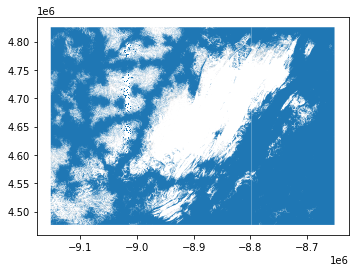

In [8]:
verizon.plot()

In [9]:
# 0 is no signal strength, and in future calculations we consider 
# -120 signal strength to be no signal. As we use median power 
# the impacts to the mean this causes do not matter.
chg['signal_strength'] = chg['signal_strength'].replace(0,-120)

In [10]:
# this lables every point with a grid ID, collecting the grid IDs
# that have extant measurements
chg_grid = gd.sjoin(chg, grid, how='left', op='within')

In [11]:
chg_grid.groupby('index_right').median()['signal_strength']

index_right
231.0      -120.000
241.0      -120.000
579.0      -120.000
590.0      -120.000
591.0      -120.000
             ...   
173860.0   -107.930
173861.0   -108.075
174209.0   -102.595
174210.0    -99.250
174558.0    -96.660
Name: signal_strength, Length: 5369, dtype: float64

In [12]:
grid['med_rxpwr'] = chg_grid.groupby('index_right').median()['signal_strength']
grid = grid.dropna()

In [13]:
original_grid['centroid'] = original_grid['geometry'].centroid
original_grid = original_grid.set_geometry('centroid')
fcc_grid = gd.sjoin(original_grid, verizon, how="left", op="within").dropna()
original_grid = original_grid.set_geometry('geometry')
original_grid = original_grid.drop('centroid', axis=1)

In [14]:
grid['chg_coverage'] = grid['med_rxpwr'] > -110
grid['verizon_coverage'] = grid.index.isin(fcc_grid.index)

In [15]:
grid.to_file("./data/by_state/WV/wv_extent_coverage.shp")

In [16]:
grid

,left,top,right,bottom,geometry,med_rxpwr,chg_coverage,verizon_coverage
id,,,,,,,,
231.0,-9.152446e+06,4.595449e+06,-9.151446e+06,4.594449e+06,"POLYGON ((-9152445.857 4595449.221, -9151445.8...",-120.000,False,False
241.0,-9.152446e+06,4.585449e+06,-9.151446e+06,4.584449e+06,"POLYGON ((-9152445.857 4585449.221, -9151445.8...",-120.000,False,False
579.0,-9.151446e+06,4.596449e+06,-9.150446e+06,4.595449e+06,"POLYGON ((-9151445.857 4596449.221, -9150445.8...",-120.000,False,True
590.0,-9.151446e+06,4.585449e+06,-9.150446e+06,4.584449e+06,"POLYGON ((-9151445.857 4585449.221, -9150445.8...",-120.000,False,False
591.0,-9.151446e+06,4.584449e+06,-9.150446e+06,4.583449e+06,"POLYGON ((-9151445.857 4584449.221, -9150445.8...",-120.000,False,False
...,...,...,...,...,...,...,...,...
173860.0,-8.654446e+06,4.768449e+06,-8.653446e+06,4.767449e+06,"POLYGON ((-8654445.857 4768449.221, -8653445.8...",-107.930,True,True
173861.0,-8.654446e+06,4.767449e+06,-8.653446e+06,4.766449e+06,"POLYGON ((-8654445.857 4767449.221, -8653445.8...",-108.075,True,True
174209.0,-8.653446e+06,4.768449e+06,-8.652446e+06,4.767449e+06,"POLYGON ((-8653445.857 4768449.221, -8652445.8...",-102.595,True,True


In [17]:
confusion_matrix = pd.crosstab(grid['chg_coverage'], grid['verizon_coverage'], rownames=['Challenger Cover'], colnames=['FCC 477 Verizon Coverage'])
print (confusion_matrix)

FCC 477 Verizon Coverage  False  True 
Challenger Cover                      
False                      1269   2293
True                        197   1610


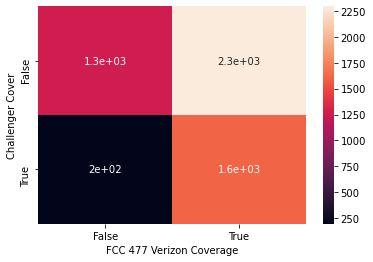

In [18]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()